In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [2]:
employee_data=pd.read_csv('./employee_data.csv')

In [3]:
employee_data.info()
employee_data.select_dtypes(include=['int64', 'float64']).columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [4]:
employee_data.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0


In [5]:
employee_data[['Age','DailyRate','DistanceFromHome','MonthlyIncome']].describe()

,Age,DailyRate,DistanceFromHome,MonthlyIncome
count,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,6502.931293
std,9.135373,403.509100,8.106864,4707.956783
min,18.000000,102.000000,1.000000,1009.000000
25%,30.000000,465.000000,2.000000,2911.000000
50%,36.000000,802.000000,7.000000,4919.000000
75%,43.000000,1157.000000,14.000000,8379.000000
max,60.000000,1499.000000,29.000000,19999.000000


In [6]:
if employee_data['Attrition'].dtype == 'object':
    employee_data['Attrition'] = employee_data['Attrition'].map({'Yes': 1, 'No': 0})
if employee_data['OverTime'].dtype == 'object':
    employee_data['OverTime'] = employee_data['OverTime'].map({'Yes': 1, 'No': 0})
if employee_data['Over18'].dtype == 'object':
    employee_data['Over18'] = employee_data['Over18'].map({'Y': 1, 'N': 0})

In [7]:
employee_data[['Attrition','OverTime','Over18']].head(5)

,Attrition,OverTime,Over18
0,1,1,1
1,0,0,1
2,1,1,1
3,0,1,1
4,0,0,1


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Attrition'}>,
        <Axes: title={'center': 'DailyRate'}>,
        <Axes: title={'center': 'DistanceFromHome'}>,
        <Axes: title={'center': 'Education'}>],
       [<Axes: title={'center': 'EmployeeCount'}>,
        <Axes: title={'center': 'EmployeeNumber'}>,
        <Axes: title={'center': 'EnvironmentSatisfaction'}>,
        <Axes: title={'center': 'HourlyRate'}>,
        <Axes: title={'center': 'JobInvolvement'}>],
       [<Axes: title={'center': 'JobLevel'}>,
        <Axes: title={'center': 'JobSatisfaction'}>,
        <Axes: title={'center': 'MonthlyIncome'}>,
        <Axes: title={'center': 'MonthlyRate'}>,
        <Axes: title={'center': 'NumCompaniesWorked'}>],
       [<Axes: title={'center': 'Over18'}>,
        <Axes: title={'center': 'OverTime'}>,
        <Axes: title={'center': 'PercentSalaryHike'}>,
        <Axes: title={'center': 'PerformanceRating'}>,
        <Axes: title={'center': 'Relations

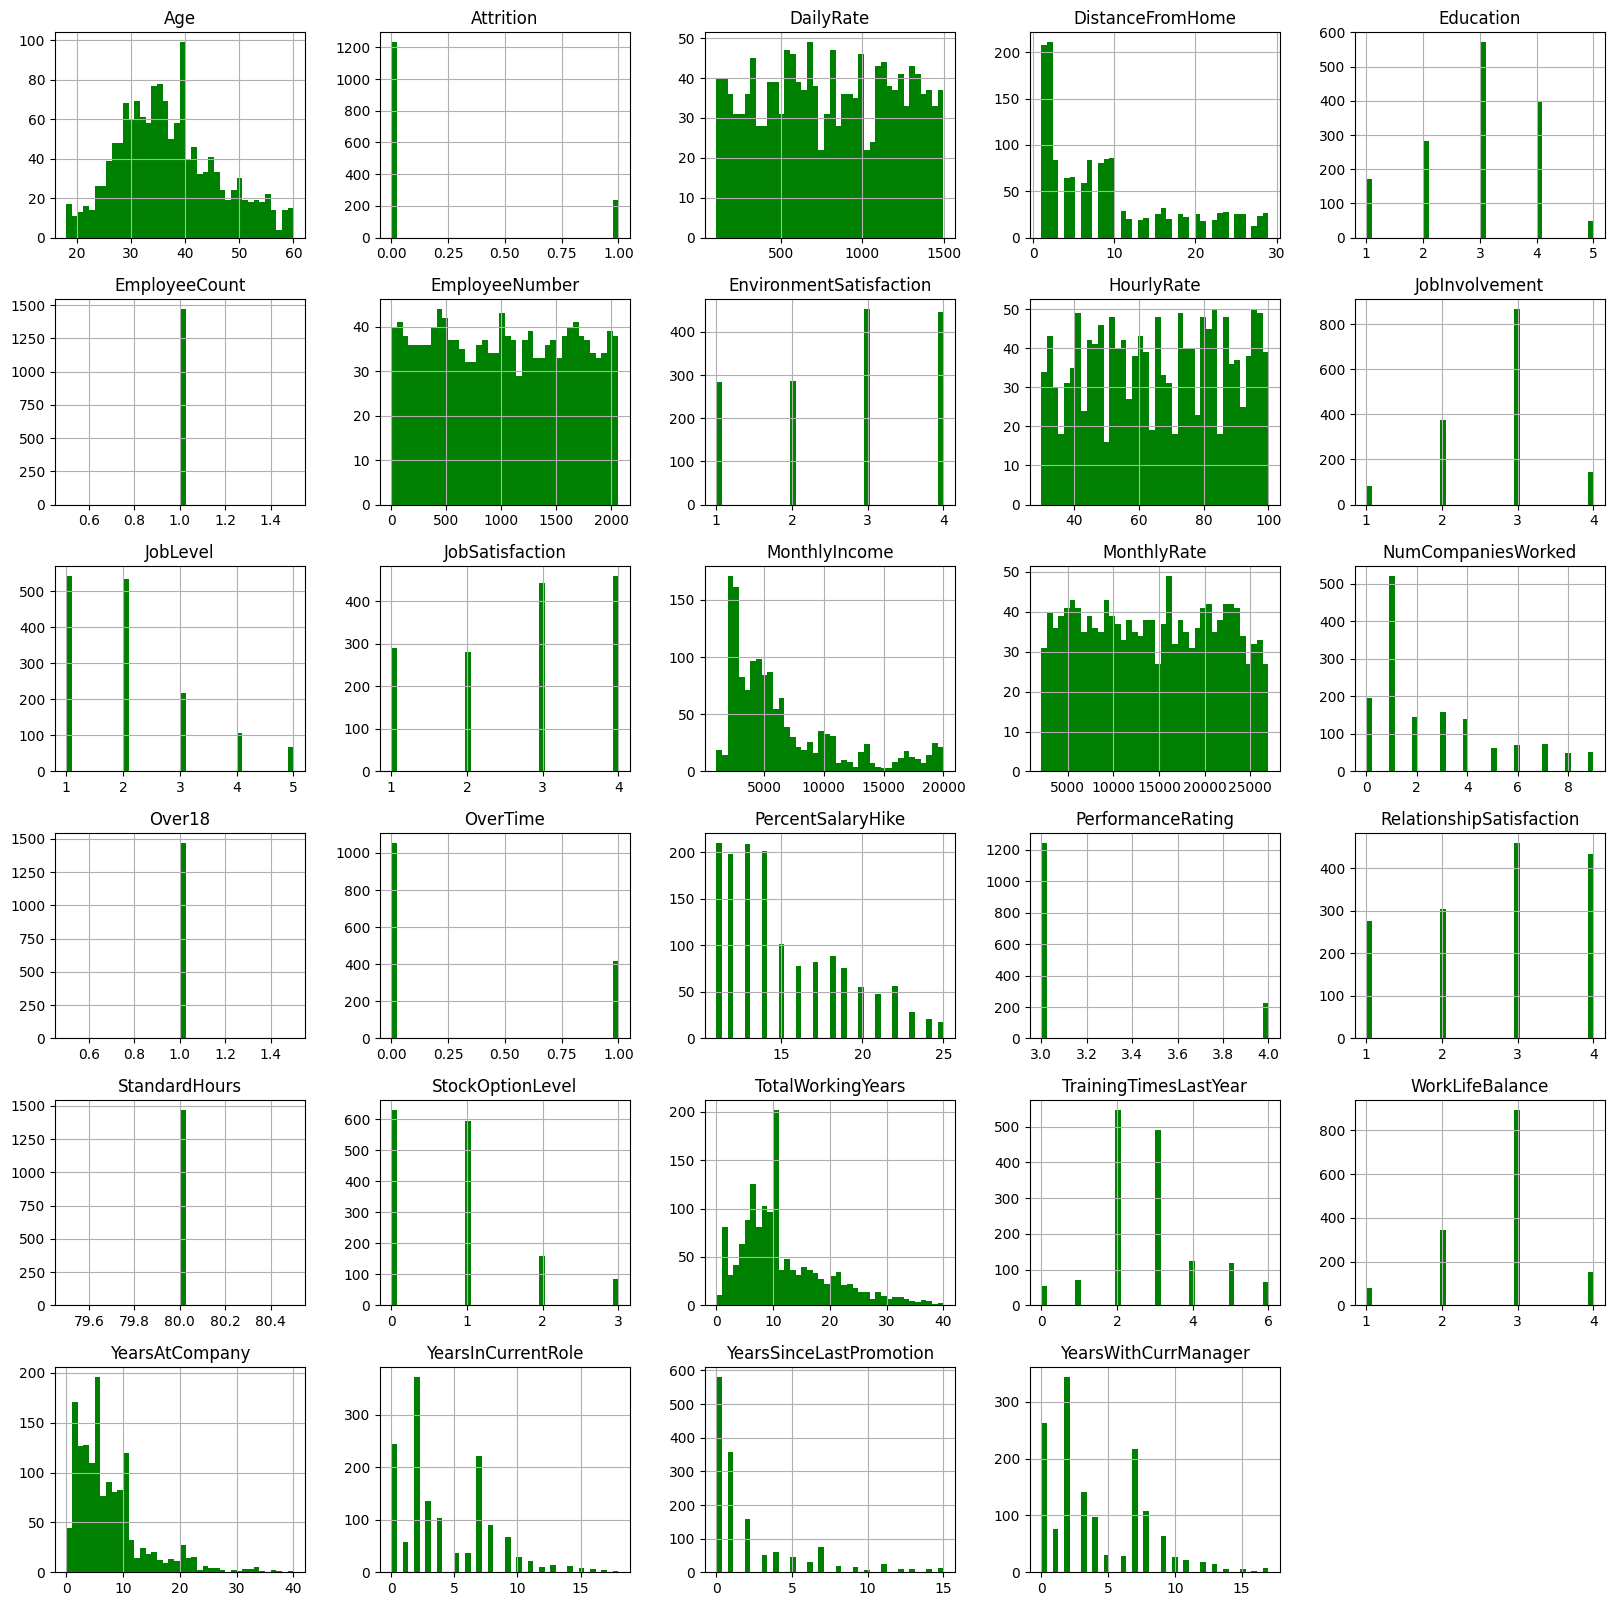

In [8]:
employee_data.hist(bins=40,figsize=(20,20),color='g')

In [9]:
employee_data.drop(labels=['Over18','EmployeeCount','StandardHours','EmployeeNumber'],axis=1,inplace=True)

In [10]:
left_df=employee_data[employee_data['Attrition']==1]
stayed_df=employee_data[employee_data['Attrition']==0]
columns=['Age','Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']

In [11]:
left_df[columns].describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,2.468354,4787.092827,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,1.118058,3640.210367,...,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1009.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,2373.000000,...,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,3.000000,3202.000000,...,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,3.000000,5916.000000,...,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,4.000000,19859.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [12]:
stayed_df[columns].describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.778589,6832.739659,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.093277,4818.208001,...,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1051.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,2.000000,3211.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,3.000000,5204.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,4.000000,8834.000000,...,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,4.000000,19999.000000,...,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


In [13]:
employee_data['Attrition'].value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

<Axes: >

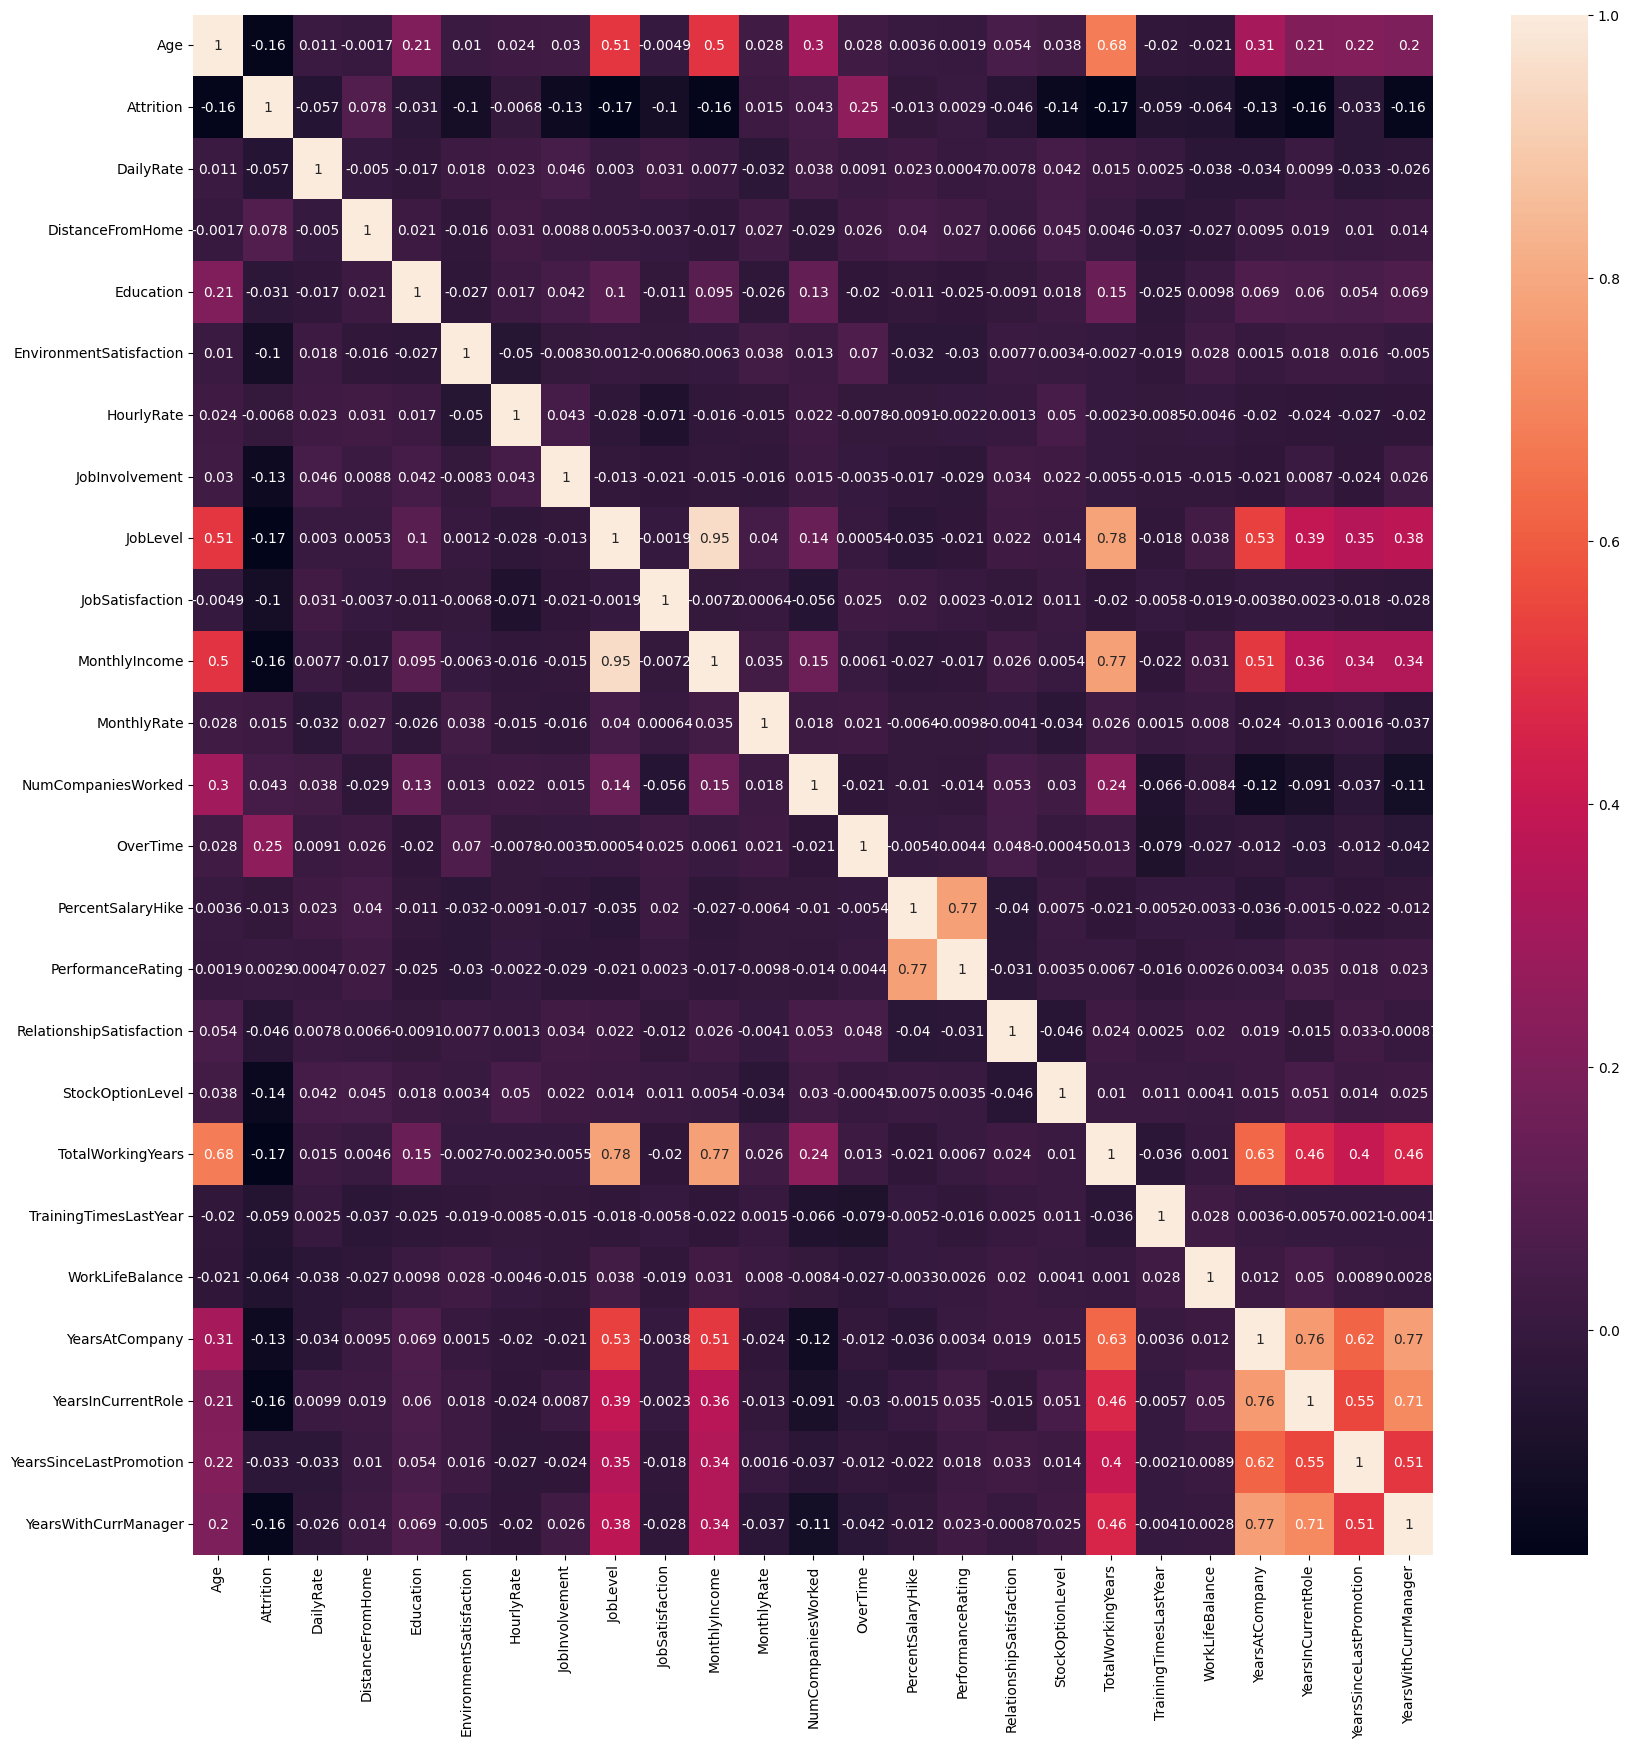

In [14]:
correlations=employee_data.select_dtypes(include=['int64']).corr()
f,ax=plt.subplots(figsize=(20,20))
sns.heatmap(correlations,annot=True)

#it helps to detect connections between the columns

<Axes: xlabel='OverTime', ylabel='count'>

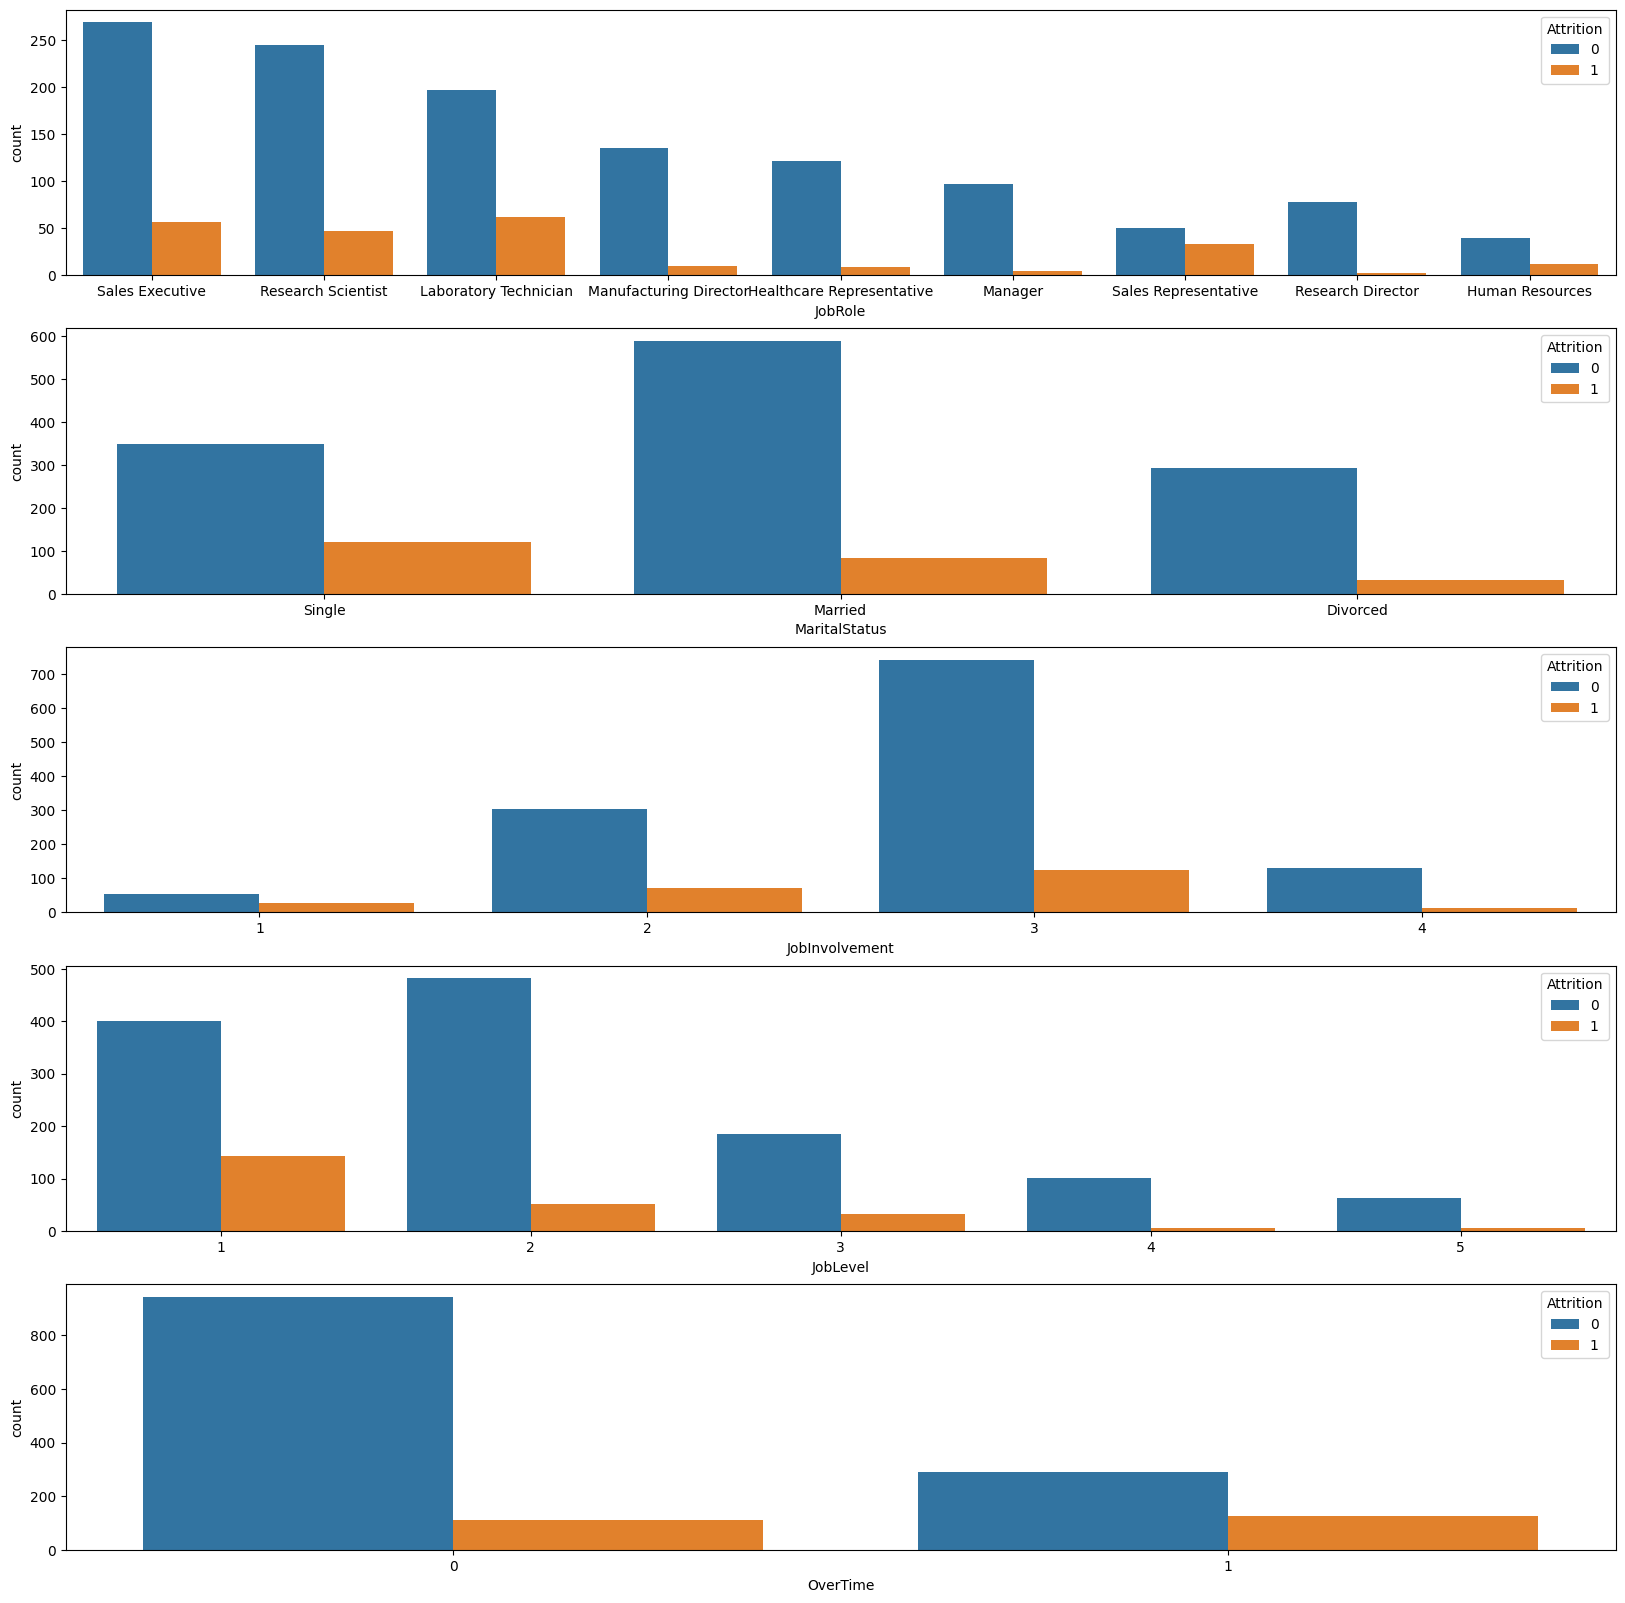

In [15]:
plt.figure(figsize=(20,20))
plt.subplot(511)
sns.countplot(data=employee_data,x='JobRole',hue='Attrition')

plt.subplot(512)
sns.countplot(data=employee_data,x='MaritalStatus',hue='Attrition')

plt.subplot(513)
sns.countplot(data=employee_data,x='JobInvolvement',hue='Attrition')

plt.subplot(514)
sns.countplot(data=employee_data,x='JobLevel',hue='Attrition')

plt.subplot(515)
sns.countplot(data=employee_data,x='OverTime',hue='Attrition')

<Axes: xlabel='MonthlyIncome', ylabel='JobRole'>

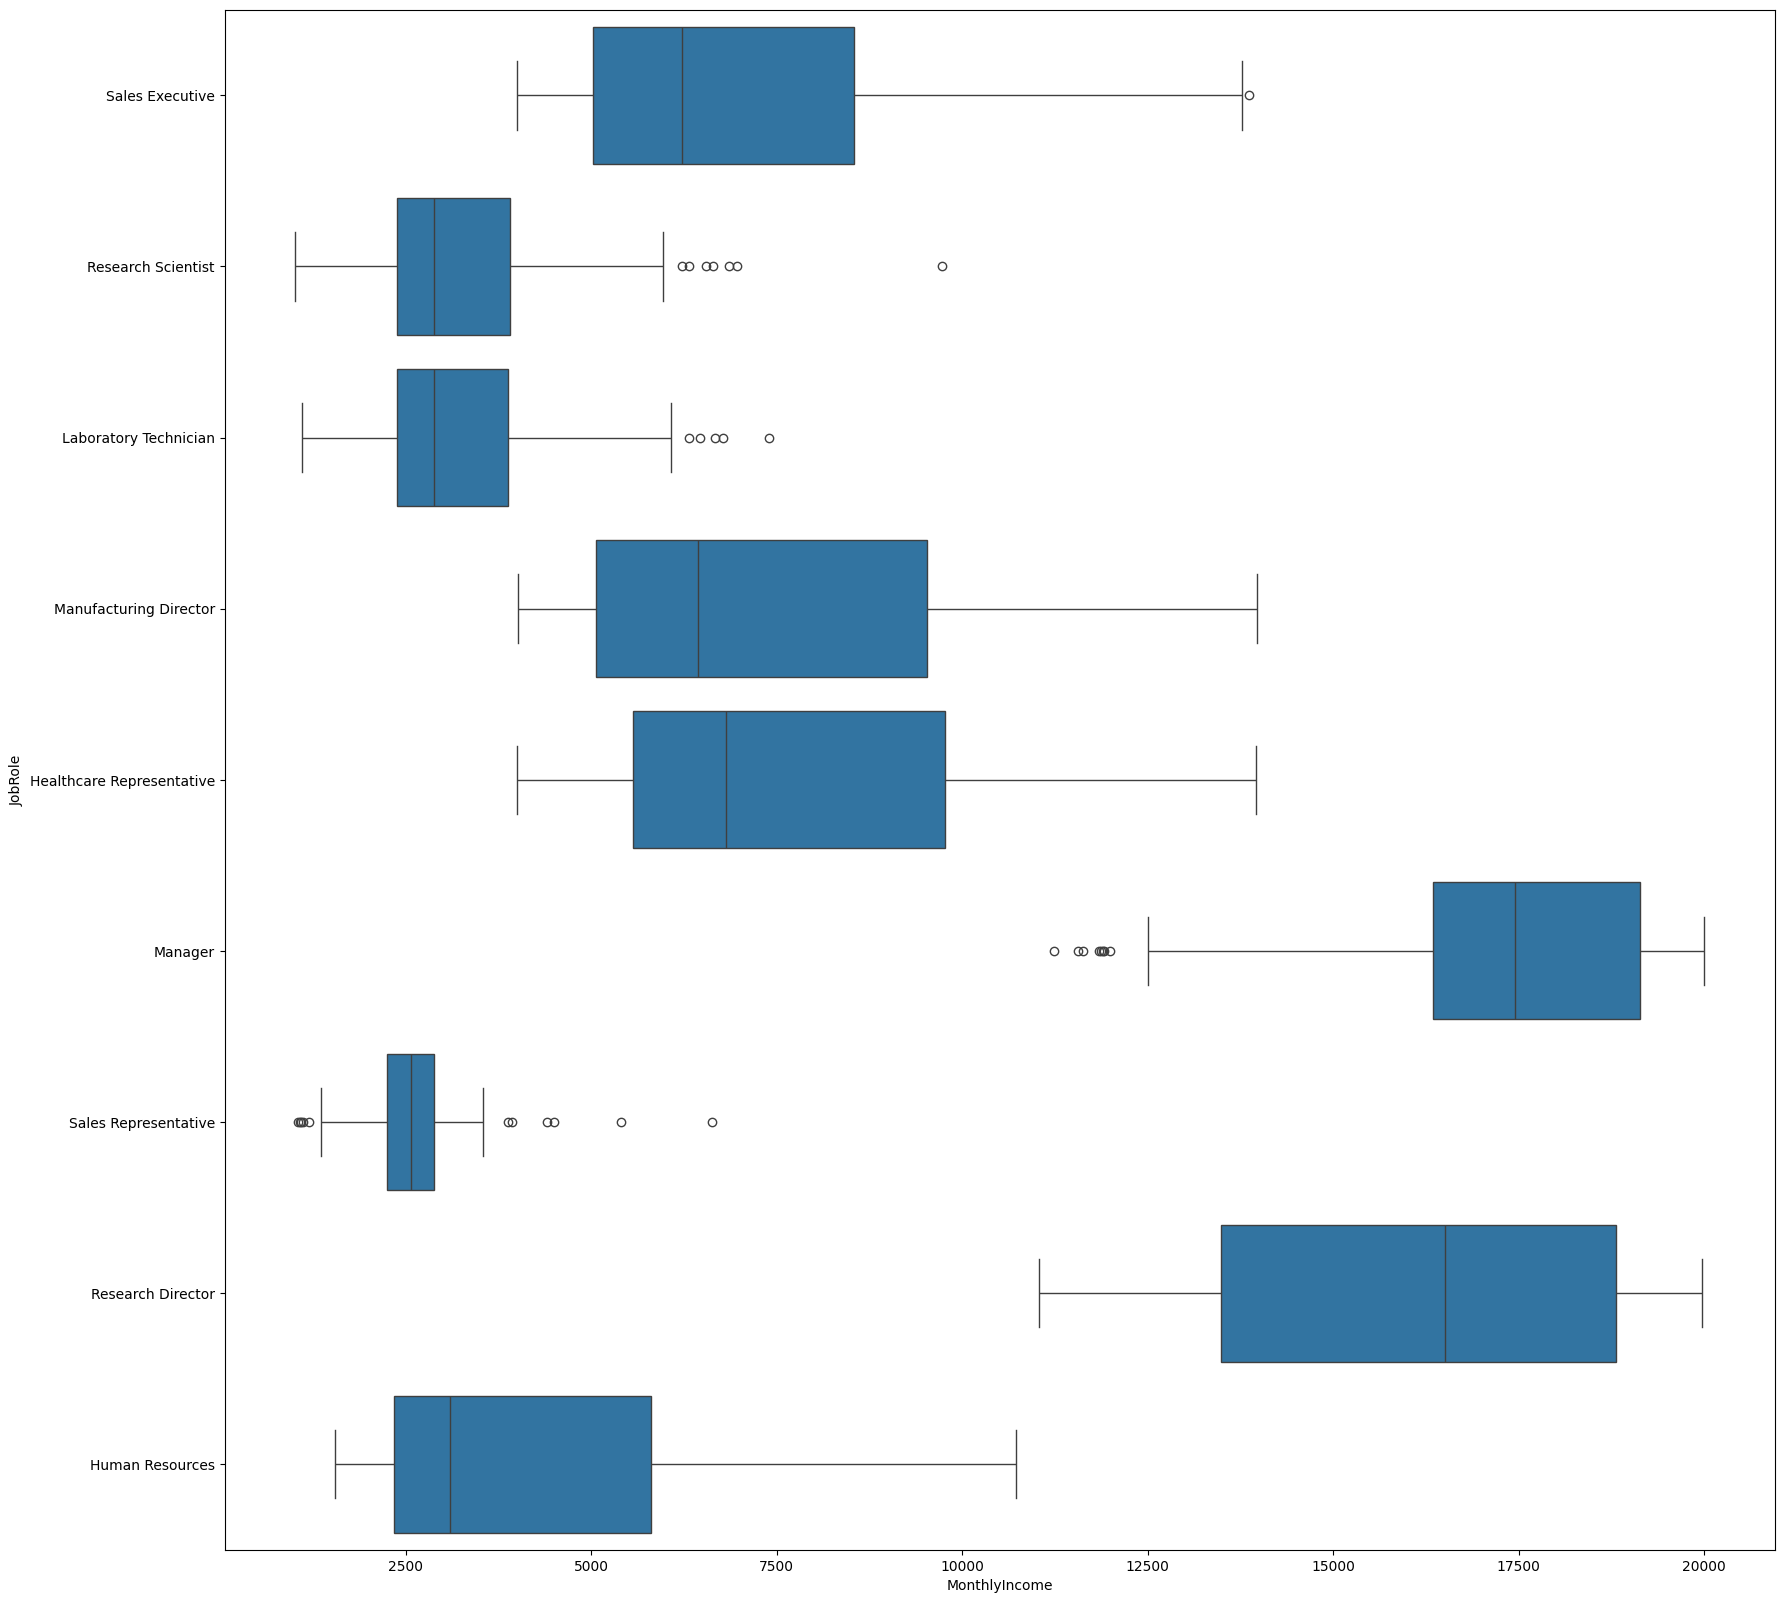

In [16]:
f=plt.figure(figsize=(20,20))
sns.boxplot(x='MonthlyIncome',y='JobRole',data=employee_data)

<Axes: xlabel='DistanceFromHome', ylabel='Density'>

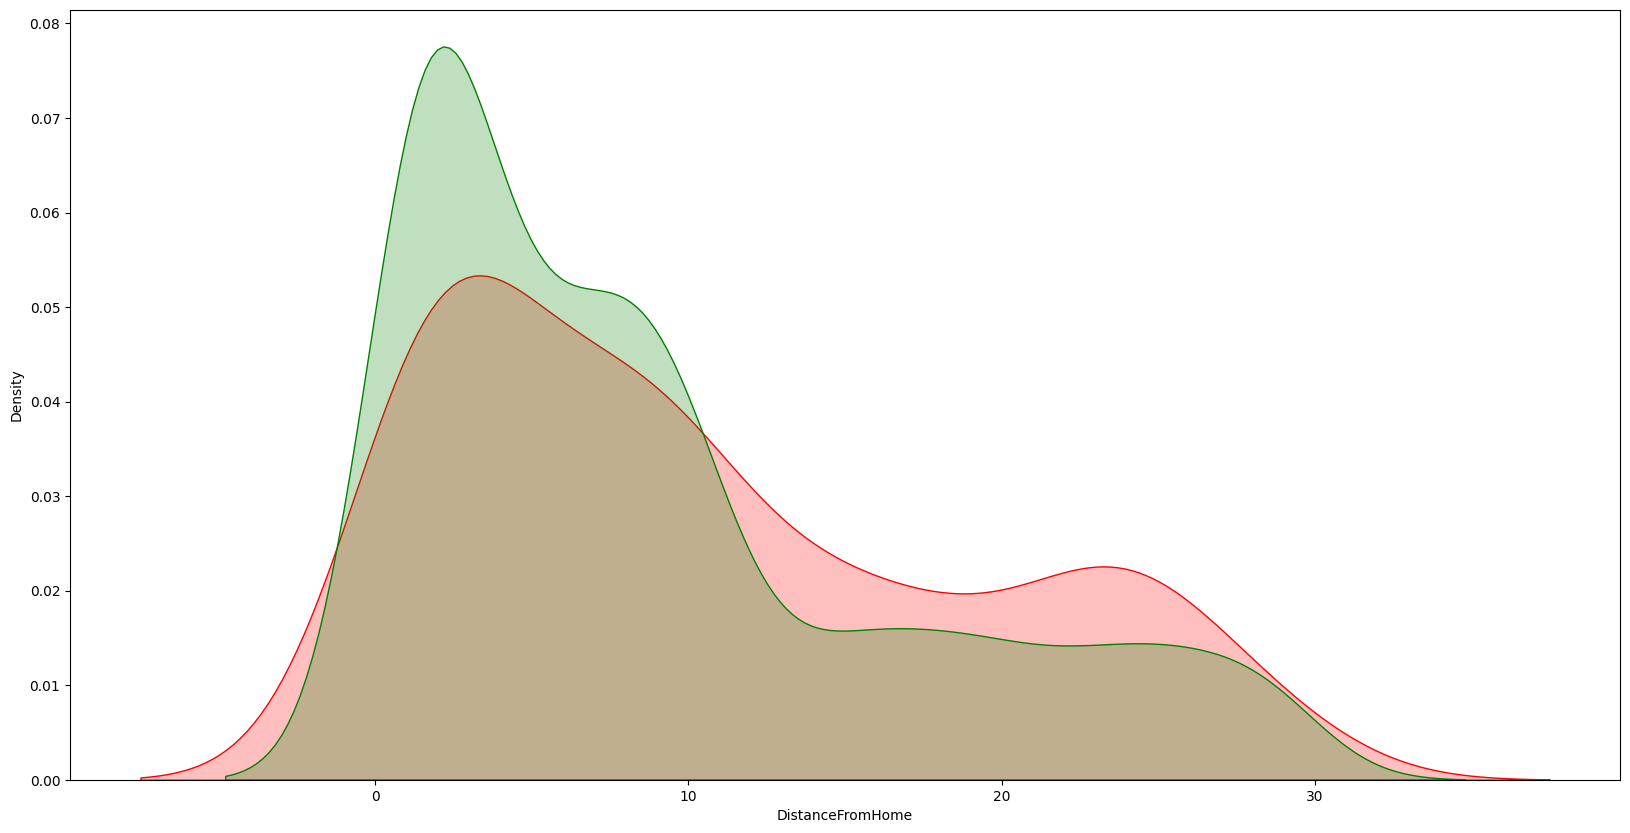

In [17]:
plt.figure(figsize=(20,10))
sns.kdeplot(data=left_df['DistanceFromHome'],label='Employee who left',fill=True,color='r')
sns.kdeplot(data=stayed_df['DistanceFromHome'],label='Employee who stayed',fill=True,color='g')

Text(0.5, 0, 'Years with the current manager')

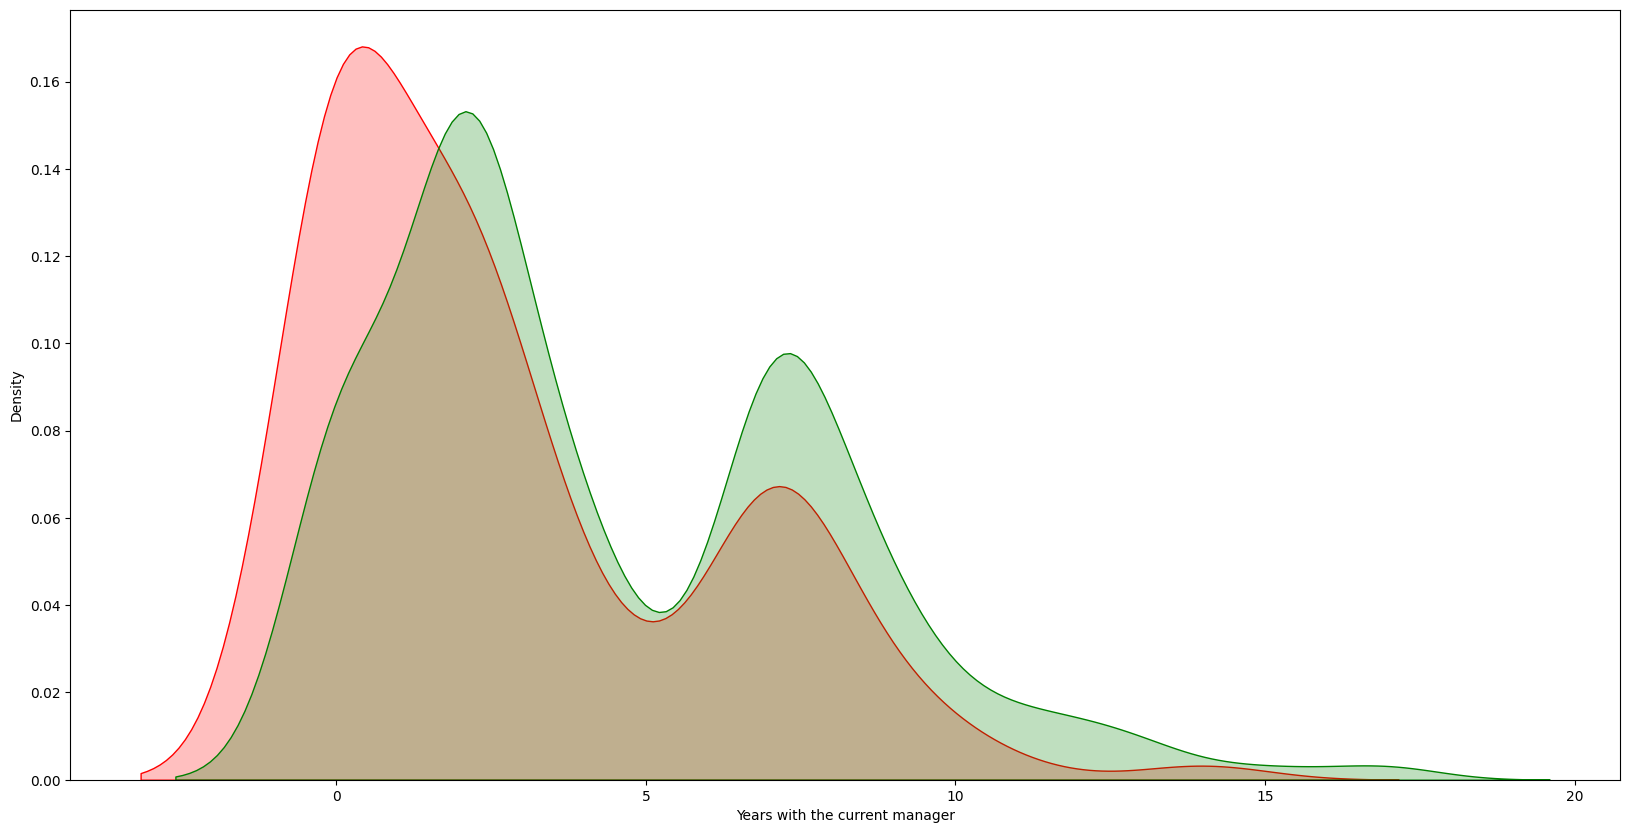

In [18]:
plt.figure(figsize=(20,10))
sns.kdeplot(data=left_df['YearsWithCurrManager'],label='Employee who left',fill=True,color='r')
sns.kdeplot(data=stayed_df['YearsWithCurrManager'],label='Employee who stayed',fill=True,color='g')

plt.xlabel("Years with the current manager")

Text(0.5, 0, 'Years of total work experience')

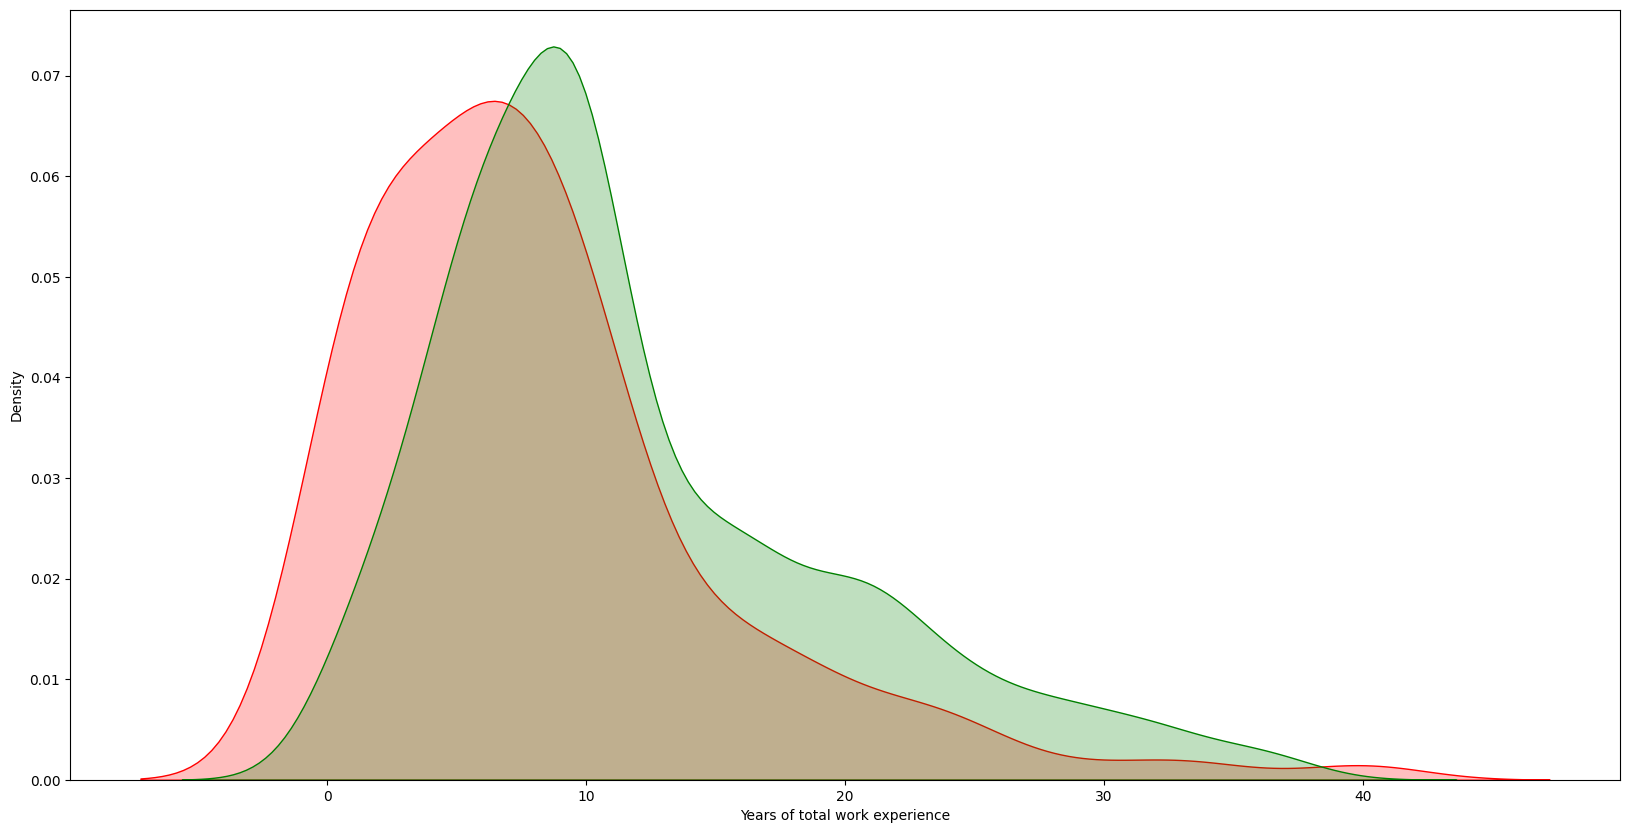

In [19]:
plt.figure(figsize=(20,10))
sns.kdeplot(data=left_df['TotalWorkingYears'],label='Employee who left',fill=True,color='r')
sns.kdeplot(data=stayed_df['TotalWorkingYears'],label='Employee who stayed',fill=True,color='g')

plt.xlabel("Years of total work experience")

In [20]:
X_cat_cols=employee_data[employee_data.select_dtypes('object').columns]
import sklearn
from sklearn.preprocessing import OneHotEncoder

onehotencoder=OneHotEncoder()

X_cat=onehotencoder.fit_transform(X_cat_cols).toarray()

In [21]:
X_cat=pd.DataFrame(X_cat)
X_cat.head(2)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [31]:
X_numerical=employee_data.select_dtypes(exclude='object')
X_numerical.drop('Attrition',axis=1,inplace=True)
X_numerical.head(2)


,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7


In [32]:

X_all=pd.concat([X_cat,X_numerical],axis=1)
X_all.dtypes

0                           float64
1                           float64
2                           float64
3                           float64
4                           float64
5                           float64
6                           float64
7                           float64
8                           float64
9                           float64
10                          float64
11                          float64
12                          float64
13                          float64
14                          float64
15                          float64
16                          float64
17                          float64
18                          float64
19                          float64
20                          float64
21                          float64
22                          float64
23                          float64
24                          float64
25                          float64
Age                           int64
DailyRate                   

In [33]:
X_all.columns = X_all.columns.astype(str)
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X=scaler.fit_transform(X_all)

In [34]:
y=employee_data['Attrition']
print(y.shape)
print(X.shape)

(1470,)
(1470, 50)


In [35]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,train_size=0.75)

In [36]:
X_train.shape

(1102, 50)

In [28]:
X_test.shape

(368, 51)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model=LogisticRegression()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)

In [70]:
train_accuracy = model.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.9001814882032668


In [38]:
print("Accuracy {} %".format(100*accuracy_score(y_pred=y_pred,y_true=y_test)))

Accuracy 86.41304347826086 %


In [46]:
plt.rcParams['axes.formatter.useoffset'] = False
plt.rcParams['axes.formatter.limits'] = (-999, 999)

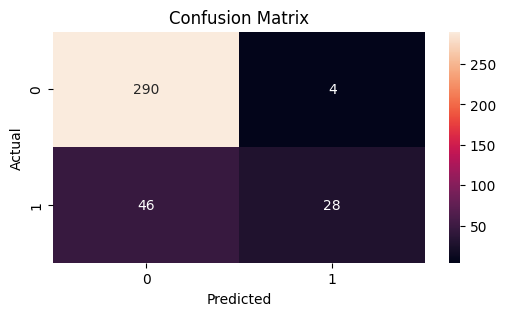

In [59]:
from sklearn.metrics import confusion_matrix,classification_report

cm=confusion_matrix(y_pred=y_pred,y_true=y_test)

plt.figure(figsize=(6,3))
sns.heatmap(cm,annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [60]:
print(classification_report(y_true=y_test,y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       294
           1       0.88      0.38      0.53        74

    accuracy                           0.86       368
   macro avg       0.87      0.68      0.72       368
weighted avg       0.87      0.86      0.84       368



In [ ]:
from xgboost import XGBClassifier

model=XGBClassifier(use_label_encoder=False,    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,              
    subsample=0.8,            
    colsample_bytree=0.8,
    reg_alpha=1,              
    reg_lambda=1,             
    
    random_state=42)

model.fit(X_train,y_train)

C:\Users\madam\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:200: UserWarning: [19:21:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:782: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,None
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes 

In [94]:
y_pred=model.predict(X_test)

<Axes: >

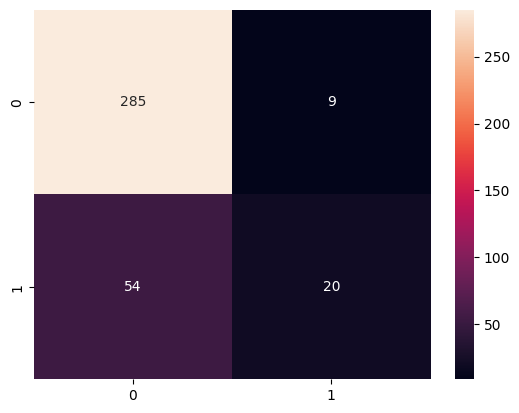

In [95]:
cm=confusion_matrix(y_pred=y_pred,y_true=y_test)
sns.heatmap(cm,annot=True,fmt='d')

In [98]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90       294
           1       0.69      0.27      0.39        74

    accuracy                           0.83       368
   macro avg       0.77      0.62      0.64       368
weighted avg       0.81      0.83      0.80       368



In [99]:
print("Train:", model.score(X_train, y_train))
print("Test :", model.score(X_test, y_test))

Train: 1.0
Test : 0.8288043478260869
